##                            Classification of Radar returns from the Ionosphere

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Users\Shubham\Downloads\Excel\ionosphere_data.csv")
df.head()

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,...,column_z,column_aa,column_ab,column_ac,column_ad,column_ae,column_af,column_ag,column_ah,column_ai
0,True,False,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,True,False,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,True,False,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,True,False,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,True,False,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [6]:
df.describe()

,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k,column_l,...,column_y,column_z,column_aa,column_ab,column_ac,column_ad,column_ae,column_af,column_ag,column_ah
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum()                                                            #no null value

column_a     0
column_b     0
column_c     0
column_d     0
column_e     0
column_f     0
column_g     0
column_h     0
column_i     0
column_j     0
column_k     0
column_l     0
column_m     0
column_n     0
column_o     0
column_p     0
column_q     0
column_r     0
column_s     0
column_t     0
column_u     0
column_v     0
column_w     0
column_x     0
column_y     0
column_z     0
column_aa    0
column_ab    0
column_ac    0
column_ad    0
column_ae    0
column_af    0
column_ag    0
column_ah    0
column_ai    0
dtype: int64

In [8]:
df['column_a'].value_counts()                                         

True     313
False     38
Name: column_a, dtype: int64

In [9]:
df['column_b'].value_counts()                                         #all values same, no deviation, dropping it. 

False    351
Name: column_b, dtype: int64

In [10]:
df1=df.drop(['column_b'],axis=1) 

## Data pre-processing 

### Converting column_a, column_ai(target) into numerical values. As numerical values required in correlation matrix and making prediction
#### Making sure multicollinearity doesnot exist between new columns i.e they are not predictors of each other. When you can derive one variable from other variables, they are known to be multi-colinear. In this situation, one needs to drop one column.

In [11]:
a = pd.get_dummies(df1['column_a'], drop_first = True)
a.value_counts()

True
1       313
0        38
dtype: int64

In [12]:
target=pd.get_dummies(df1['column_ai'], drop_first = True)

In [13]:
df2= pd.concat([df1, a, target], axis = 1)
df3=df2.drop(['column_a', 'column_ai'], axis = 1)

In [14]:
df3.head()

,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k,column_l,...,column_aa,column_ab,column_ac,column_ad,column_ae,column_af,column_ag,column_ah,True,g
0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,...,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1,1
1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,...,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,1,0
2,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,...,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1,1
3,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,...,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,1,0
4,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,...,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1,1


In [15]:
df4=df3.rename(columns={True: "column_a_True", "g": "Target_g"})
df4.head()

,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k,column_l,...,column_aa,column_ab,column_ac,column_ad,column_ae,column_af,column_ag,column_ah,column_a_True,Target_g
0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,...,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1,1
1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,...,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,1,0
2,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,...,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1,1
3,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,...,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,1,0
4,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,...,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1,1


#### Now all features and target value are in numerical value.

## Feature selection

<AxesSubplot:>

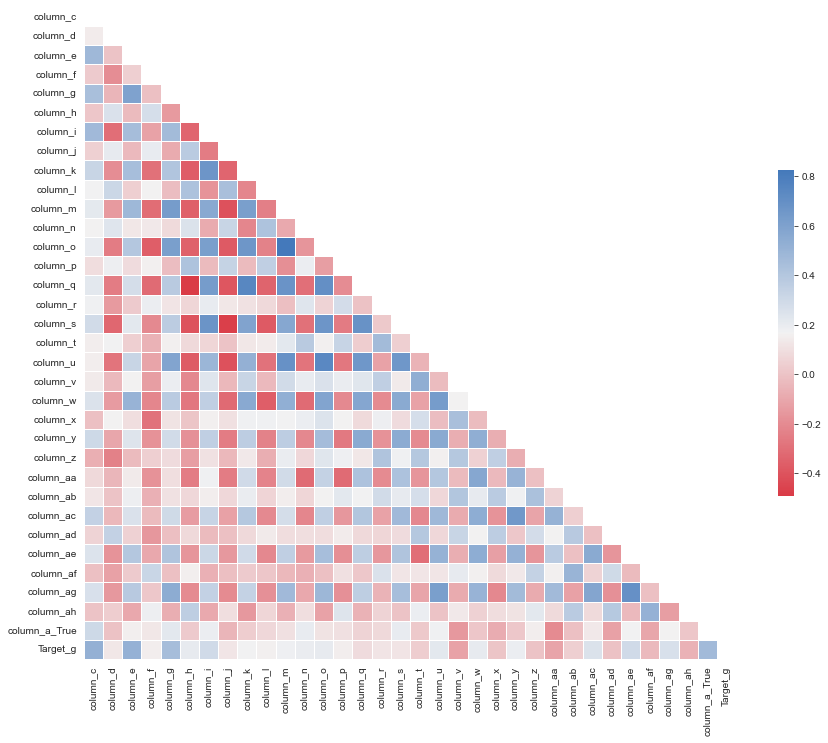

In [16]:
corr = df4.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')   
f, ax = plt.subplots(figsize=(15, 12))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

### Target_g has high correlation with column_c, e, g, a, v, aa; one can drop column_f, k,l,m, m, o,p.

In [17]:
df5=df4.drop(['column_f', 'column_k','column_l','column_m','column_o','column_p'], axis = 1)

## Model fit without dropping columns

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df4.drop(['Target_g'], axis=1)
y = df4.Target_g

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)  

0.8873239436619719

#### Logistic regression accuracy varying from 80% to 90% (without dropping columns) 

In [21]:
model.coef_  

array([[ 1.34527897,  0.62329042,  1.75728907,  0.76587572,  0.79699589,
         1.28377151,  0.82227161,  0.18582008, -0.42051627, -0.35815966,
        -0.10255862,  0.60505905,  0.63908618, -0.31223905, -0.16325985,
         0.57100452, -0.39372814, -0.09043125, -0.08791462, -1.98536427,
         0.62365386, -0.01449979,  0.84221894,  0.81612929, -1.90548443,
        -0.18168924,  0.56686345,  0.87376532,  0.45115984, -0.16561583,
        -0.03146906, -1.18887734,  2.20346357]])

In [22]:
model.intercept_  

array([-3.96892776])

In [23]:
x_predict=['1','0.24','1','0.48','1','0.7','1','1','1','1','1','1','1','0.77','1','1','1','1','0.74','1',
           '0.89','1','0.64','1','0.38','1','0.10','1','0.17','1','-0.81','1','1']

In [24]:
model.predict([x_predict])

C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:557: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array([1], dtype=uint8)

In [25]:
model.predict_proba([x_predict]) 

C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:557: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array([[0.03835479, 0.96164521]])

### Predicted 1 (good radar) return for x_predict with 97% probability. 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
from sklearn.svm import SVC
model_ = SVC()
model_.fit(X_train, y_train)
model_.score(X_test, y_test)

0.9295774647887324

In [27]:
model_.predict([x_predict])

C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1], dtype=uint8)

### Model fit by dropping columns

In [28]:
X = df5.drop(['Target_g'], axis=1)
y = df5.Target_g

### 1. Logistic regression

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train), model.score(X_test,y_test)  

(0.9142857142857143, 0.8873239436619719)

#### In Logistic regression, High standard deviation of model accuracy as less dataset numbers (80% to 90%) as less data size. 

### 2. Support vector machine

In [347]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
from sklearn.svm import SVC
model_ = SVC()
model_.fit(X_train, y_train)
model_.score(X_train, y_train), model_.score(X_test, y_test)

(0.9714285714285714, 0.8873239436619719)

#### In SVM, also High standard deviation of model accuracy as less dataset numbers.(88% to 98%) as less data size.

### 3. Naive Bayes model

In [224]:
from sklearn.naive_bayes import GaussianNB

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
gnb = GaussianNB()                                          #using gaussian distribution as features are continuous
gnb.fit(X_train, y_train)
gnb.score(X_train,y_train), gnb.score(X_test,y_test)

(0.8857142857142857, 0.8873239436619719)

### 4. Decision tree

In [233]:
from sklearn import tree

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
model_tree.score(X_train,y_train), model_tree.score(X_test,y_test)

(1.0, 0.8591549295774648)

### 5. Random forest

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
from sklearn.ensemble import RandomForestClassifier 
model_forest = RandomForestClassifier(n_estimators=20)
model_forest.fit(X_train, y_train)
model_forest.score(X_train,y_train), model_forest.score(X_test,y_test)

(1.0, 0.9295774647887324)

### Both decision tree and Random forest overfits the training data. Regularization is required the models.

### Conclusion 
#### 1: One can check model score, with categorical variables. But for prediction and correlation matrix requires numerical values. 
#### 2. SVM gives better accuracy when high number of features are present than Logistic. Logistic faces issue when large number of features. 
#### 3. Logistic and SVM(Linear) handles multi-collinearity well i.e with/without dropping uncorrelated features the model accuracy remains the same. 